# Introduction to Predictive Analysis

Hands-on introduction to predictive modeling: we will build a simple regression model, evaluate it, and inspect predictions. This notebook keeps examples small and explains each step for beginners.

In [3]:
# Setup - minimal imports for a simple regression demo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
%matplotlib inline
np.random.seed(0)
plt.style.use('seaborn-v0_8-whitegrid')

## Synthetic regression problem
Create a simple dataset with a few features and a continuous target. We'll keep n small so runs are quick (n=150).

What we'll do (step-by-step):
1. Create a small synthetic dataset.
2. Split into train/test.
3. Fit a simple Linear Regression.
4. Evaluate with MAE and R² and inspect predictions.

Notes:
- Try Ridge/Lasso if coefficients look unstable.
- Try cross-validation to get more stable metrics.

In [4]:
# 1) Create a tiny dataset (n=150)
n = 150
X1 = np.random.normal(loc=0, scale=1, size=n)
X2 = np.random.normal(loc=3, scale=2, size=n)
X3 = np.random.binomial(1, 0.25, size=n)
y = 2.5 * X1 + 0.8 * X2 + 1.5 * X3 + np.random.normal(0, 0.8, size=n)
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
df.head()

,X1,X2,X3,y
0,1.764052,2.863517,0,6.997604
1,0.400157,6.426685,0,6.255391
2,0.978738,1.510490,0,4.871233
3,2.240893,1.347123,0,8.055603
4,1.867558,2.803095,0,7.654975


In [5]:
# 2) Split into train/test
X = df[['X1','X2','X3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (120, 3) Test shape: (30, 3)


In [6]:
# 3) Fit a simple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))
print('R2:', r2_score(y_test, preds))

MAE: 0.6700340973543834
R2: 0.8228612574058288


Intercept: -0.006876497993490993
Coefficients:
X1    2.618544
X2    0.762577
X3    1.669243
dtype: float64


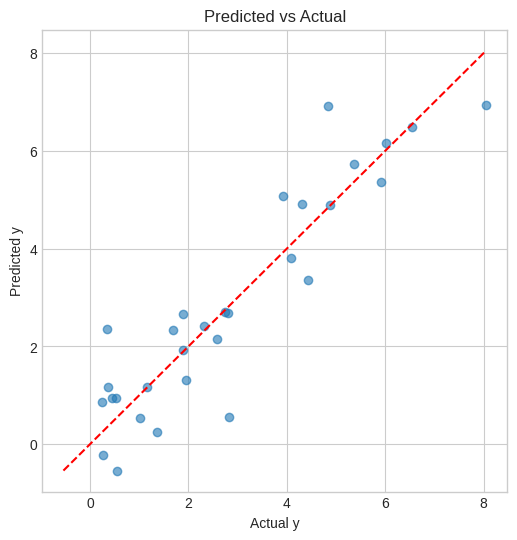

In [7]:
# 4) Inspect coefficients and basic interpretation
coeffs = pd.Series(model.coef_, index=X.columns)
print('Intercept:', model.intercept_)
print('Coefficients:')
print(coeffs)
# Plot predicted vs actual
plt.figure(figsize=(6,6))
lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
plt.scatter(y_test, preds, alpha=0.6)
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Actual')
plt.show()

In [8]:
# Optional: quick check with Ridge (regularized) to compare coefficients
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
print('Ridge MAE:', mean_absolute_error(y_test, ridge_preds))
print('Ridge R2:', r2_score(y_test, ridge_preds))
print('Ridge coeffs:')
print(pd.Series(ridge.coef_, index=X.columns))

Ridge MAE: 0.660195005691785
Ridge R2: 0.8281020436565549
Ridge coeffs:
X1    2.593310
X2    0.760002
X3    1.586862
dtype: float64


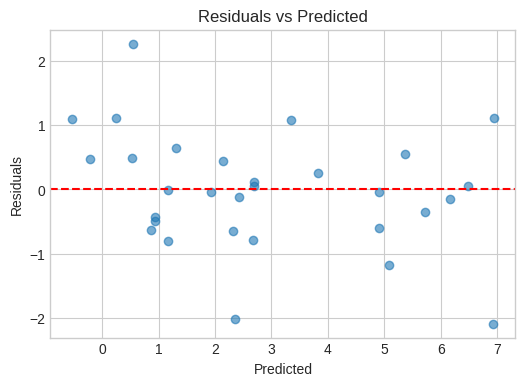

In [9]:
# Quick residual plot to inspect model fit
residuals = y_test - preds
plt.figure(figsize=(6,4))
plt.scatter(preds, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [10]:
# Short exercise: try different features or noise levels to see how metrics change
# For example, re-run dataset generation with larger noise and compare MAE/R2
print('Try: change the noise in the synthetic data and re-run the pipeline to observe effects on MAE/R2')

Try: change the noise in the synthetic data and re-run the pipeline to observe effects on MAE/R2


In [11]:
# Clean up: display a short summary DataFrame of results
summary = pd.DataFrame({
    'model': ['LinearRegression','Ridge(alpha=1.0)'],
    'MAE': [mean_absolute_error(y_test, preds), mean_absolute_error(y_test, ridge_preds)],
    'R2': [r2_score(y_test, preds), r2_score(y_test, ridge_preds)]
})
summary

,model,MAE,R2
0,LinearRegression,0.670034,0.822861
1,Ridge(alpha=1.0),0.660195,0.828102


In [12]:
# Final short tips for learners (printable)
print('- Keep datasets small when learning to iterate quickly.')
print('- Inspect coefficients but remember correlation/collinearity can affect interpretation.')
print('- Use cross-validation and regularization when in doubt.')

- Keep datasets small when learning to iterate quickly.
- Inspect coefficients but remember correlation/collinearity can affect interpretation.
- Use cross-validation and regularization when in doubt.


In [13]:
# (Empty helper cell) - you can run small experiments here
